In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow scikit-learn seaborn matplotlib pandas numpy scipy

*Part 1: Data Loading and Cleaning*

In [ ]:
import pandas as pd
import numpy as np
import io

file_path = '/content/sample_data/sample_sales_data.csv'
import os
if os.path.exists(file_path):
    print("✅ File found at", file_path)
else:
    print("⚠️ File not found—check path or use fallback.")


sales_data = pd.read_csv(file_path, encoding='latin1')
print("✅ Full data loaded from", file_path)


print("Data loaded. Shape:", sales_data.shape)
print(sales_data.head())

# Cleaning
print("\nMissing Values:\n", sales_data.isnull().sum())
sales_data.fillna(0, inplace=True)

# Standardize columns: lowercase, underscores, rename key ones
sales_data.columns = sales_data.columns.str.strip().str.lower().str.replace(' ', '_')
sales_data.rename(columns={
    'orderdate': 'date',
    'ordernumber': 'ordernumber',
    'customername': 'customer_name',
    'productcode': 'product_code',
    'quantityordered': 'quantity',
    'priceeach': 'price_each',
    'sales': 'sales'  # Already good
}, inplace=True)

# Parse dates (format: MM/DD/YYYY H:MM) - handles '2/24/2003 0:00'
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%m/%d/%Y %H:%M')

# Add year/month for EDA
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month

# Save cleaned (optional) - saves to /content/
sales_data.to_csv('/content/cleaned_sales_data.csv', index=False)
print("Cleaned data saved to '/content/cleaned_sales_data.csv'.")
print("\nCleaned columns:", sales_data.columns.tolist())

✅ File found at /content/sample_data/sample_sales_data.csv
✅ Full data loaded from /content/sample_data/sample_sales_data.csv
Data loaded. Shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE

*Part 2: Exploratory Data Analysis (EDA)*


=== EDA ===
        ordernumber     quantity   price_each  orderlinenumber         sales  \
count   2823.000000  2823.000000  2823.000000      2823.000000   2823.000000   
mean   10258.725115    35.092809    83.658544         6.466171   3553.889072   
min    10100.000000     6.000000    26.880000         1.000000    482.130000   
25%    10180.000000    27.000000    68.860000         3.000000   2203.430000   
50%    10262.000000    35.000000    95.700000         6.000000   3184.800000   
75%    10333.500000    43.000000   100.000000         9.000000   4508.000000   
max    10425.000000    97.000000   100.000000        18.000000  14082.800000   
std       92.085478     9.741443    20.174277         4.225841   1841.865106   

                                date       qtr_id     month_id     year_id  \
count                           2823  2823.000000  2823.000000  2823.00000   
mean   2004-05-11 00:16:49.989373056     2.717676     7.092455  2003.81509   
min              2003-01-06 00:0

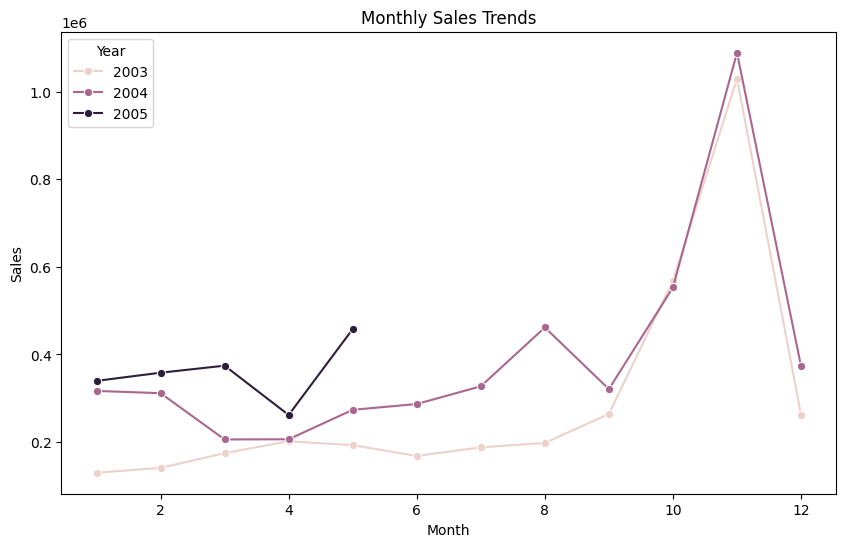


Top Customers:
 customer_name
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Name: sales, dtype: float64


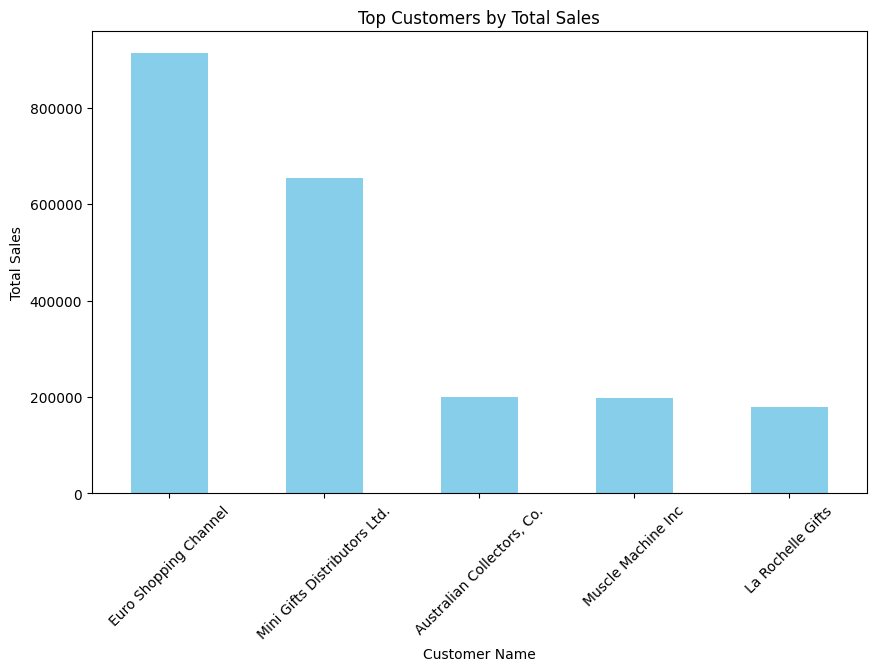


Top Products:
 product_code
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
Name: sales, dtype: float64


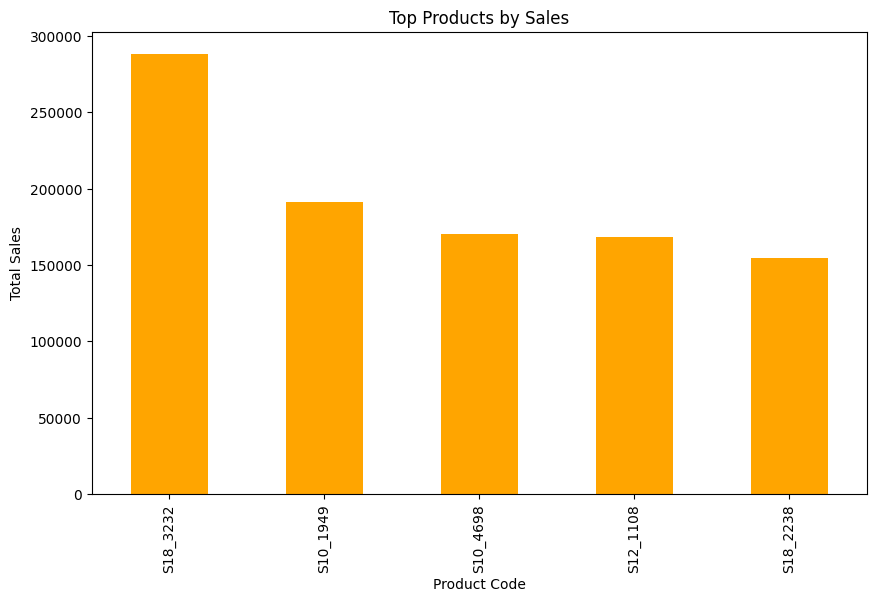

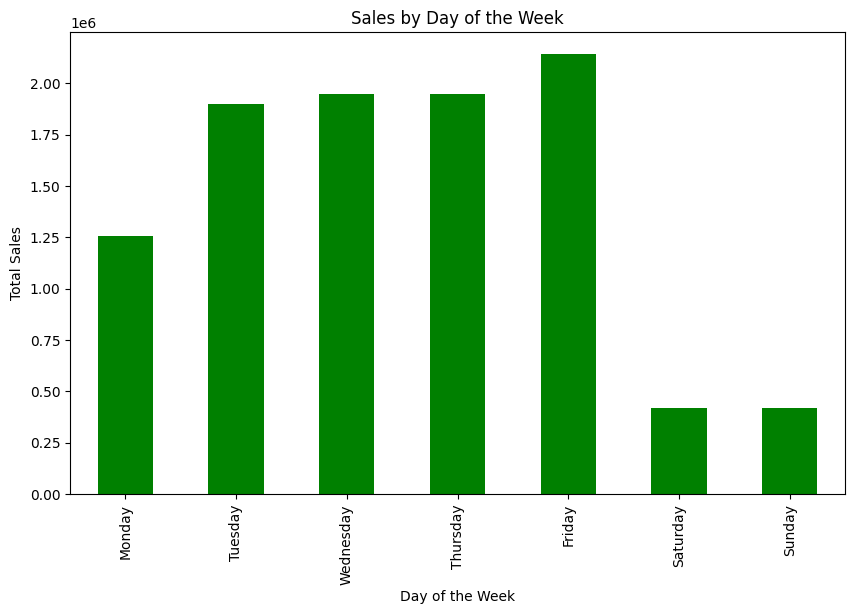


Sales by City:
 city
Madrid         1082551.44
San Rafael      654858.06
NYC             560787.77
Singapore       288488.41
Paris           268944.68
                  ...    
Brisbane         50218.51
Los Angeles      48048.46
Burbank          46084.64
Munich           34993.92
Charleroi        33440.10
Name: sales, Length: 73, dtype: float64


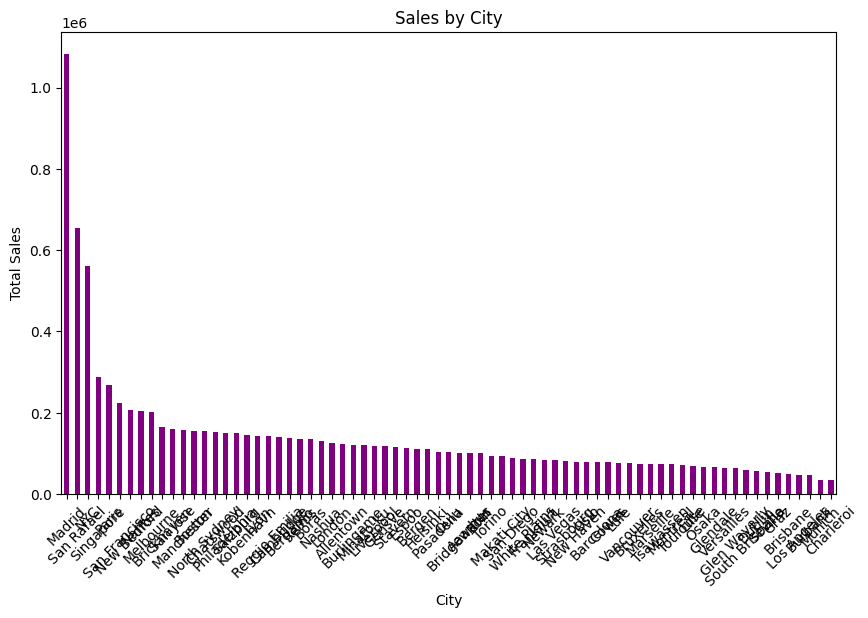


RFM Data:
                              recency  frequency   monetary
customer_name                                             
AV Stores, Co.                   195          3  157807.81
Alpha Cognac                      64          3   70488.44
Amica Models & Co.               264          2   94117.26
Anna's Decorations, Ltd           83          4  153996.13
Atelier graphique                187          3   24179.96
...                              ...        ...        ...
Vida Sport, Ltd                  274          2  117713.56
Vitachrome Inc.                  207          3   88041.26
Volvo Model Replicas, Co         193          4   75754.88
West Coast Collectables Co.      488          2   46084.64
giftsbymail.co.uk                211          2   78240.84

[92 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== EDA ===")
print(sales_data.describe())

# 1. Monthly Sales Trends
monthly_sales = sales_data.groupby(['year', 'month'])['sales'].sum().reset_index()
print("\nMonthly Sales:\n", monthly_sales)
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

# 2. Top Customers
top_customers = sales_data.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(5)  # All 5
print("\nTop Customers:\n", top_customers)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# 3. Top Products
product_sales = sales_data.groupby('product_code')['sales'].sum().sort_values(ascending=False).head(5)
print("\nTop Products:\n", product_sales)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='orange')
plt.title('Top Products by Sales')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.show()

# 4. Sales by Day of Week
sales_data['day_of_week'] = sales_data['date'].dt.day_name()
weekly_sales = sales_data.groupby('day_of_week')['sales'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days).fillna(0)
plt.figure(figsize=(10, 6))
weekly_sales.plot(kind='bar', color='green')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# 5. Regional Sales (by City)
region_sales = sales_data.groupby('city')['sales'].sum().sort_values(ascending=False)
print("\nSales by City:\n", region_sales)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='purple')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# 6. RFM Analysis
reference_date = sales_data['date'].max()
rfm_data = sales_data.groupby('customer_name').agg({
    'date': lambda x: (reference_date - x.max()).days,
    'ordernumber': 'nunique',
    'sales': 'sum'
}).rename(columns={'date': 'recency', 'ordernumber': 'frequency', 'sales': 'monetary'})
print("\nRFM Data:\n", rfm_data)
rfm_data.to_csv('rfm_analysis.csv', index=True)

*Part 3: Linear Regression Forecasting*


=== Linear Regression Forecasting ===
Monthly data points: 29 (e.g., 2003-01-01 00:00:00 to 2005-05-01 00:00:00)
Monthly sales stats:
 count    2.900000e+01
mean     3.459527e+05
std      2.277866e+05
min      1.297536e+05
25%      2.016095e+05
50%      2.866742e+05
75%      3.728027e+05
max      1.089048e+06
Name: sales, dtype: float64
Model MSE: 51,771,661,262.74
Baseline (mean) MSE: 111,560,750,653.80
Improvement: 53.6%
Forecast for next month (1/2006): $374,643.01


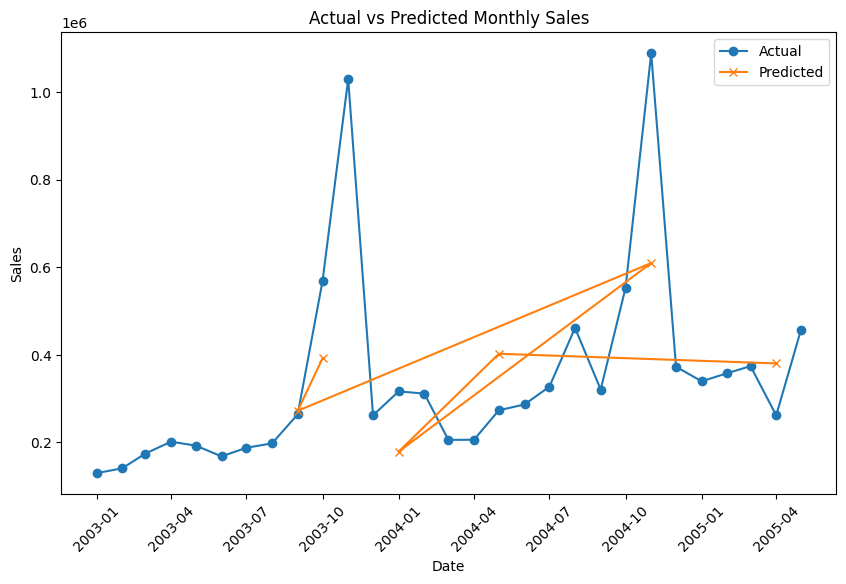

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

print("\n=== Linear Regression Forecasting ===")
# Aggregate to monthly (sum sales per month)
monthly_agg = sales_data.groupby(sales_data['date'].dt.to_period('M')).agg({'sales': 'sum'}).reset_index()
monthly_agg['date'] = monthly_agg['date'].dt.to_timestamp()
monthly_agg['year'] = monthly_agg['date'].dt.year
monthly_agg['month'] = monthly_agg['date'].dt.month

# Add quarter for better seasonality
monthly_agg['quarter'] = monthly_agg['month'] // 3 + 1

# Features: year, month, quarter (enhanced)
X = monthly_agg[['year', 'month', 'quarter']]
y = monthly_agg['sales']

print(f"Monthly data points: {len(monthly_agg)} (e.g., {monthly_agg['date'].min()} to {monthly_agg['date'].max()})")
print("Monthly sales stats:\n", y.describe())

if len(X) > 3:  # Need min for split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)

    # Predict on test
    predictions = model_lr.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    # Baseline: Mean predictor MSE
    baseline_mse = mean_squared_error(y_test, np.full_like(y_test, y_train.mean()))

    print(f"Model MSE: {mse:,.2f}")
    print(f"Baseline (mean) MSE: {baseline_mse:,.2f}")
    print(f"Improvement: {((baseline_mse - mse) / baseline_mse * 100):.1f}%")

    # Forecast next month (fix warning: use DataFrame with columns)
    next_year = monthly_agg['year'].max() + 1
    next_month = (monthly_agg['month'].max() % 12) + 1
    next_quarter = next_month // 3 + 1
    next_input = pd.DataFrame([[next_year, next_month, next_quarter]], columns=['year', 'month', 'quarter'])
    next_forecast = model_lr.predict(next_input)[0]
    print(f"Forecast for next month ({next_month}/{next_year}): ${next_forecast:,.2f}")

    # Optional: Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_agg['date'], y, label='Actual', marker='o')
    test_dates = monthly_agg.loc[X_test.index, 'date']  # Align dates
    plt.plot(test_dates, predictions, label='Predicted', marker='x')
    plt.title('Actual vs Predicted Monthly Sales')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Not enough monthly data for split—check date parsing.")

*Part 4: LSTM Forecasting*


=== LSTM Forecasting ===


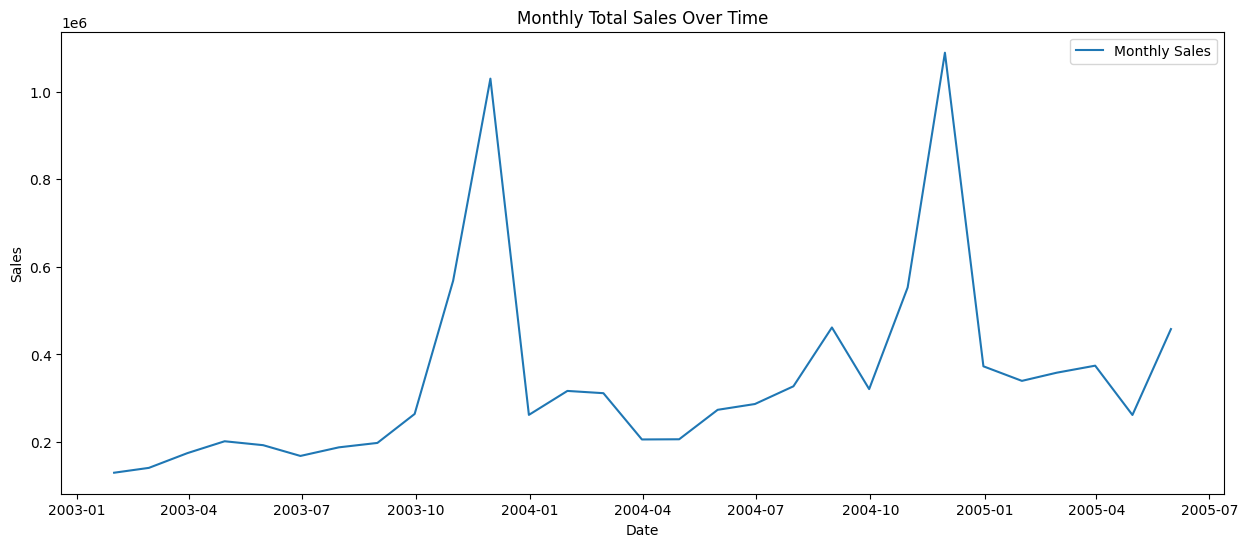

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.1630 - val_loss: 0.0091
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0249 - val_loss: 0.0078
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0612 - val_loss: 0.0224
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0459 - val_loss: 0.0082
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0522 - val_loss: 0.0178
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0487 - val_loss: 0.0085
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0777 - val_loss: 0.0126
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0330 - val_loss: 0.0084
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0388 - val_loss: 0.0137
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0569 - val_loss: 0.0153
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0945 - val_loss: 0.0138
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss

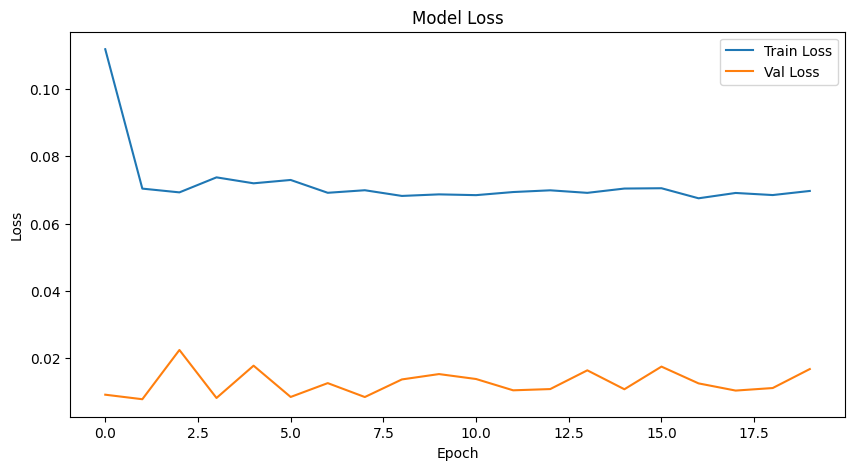

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


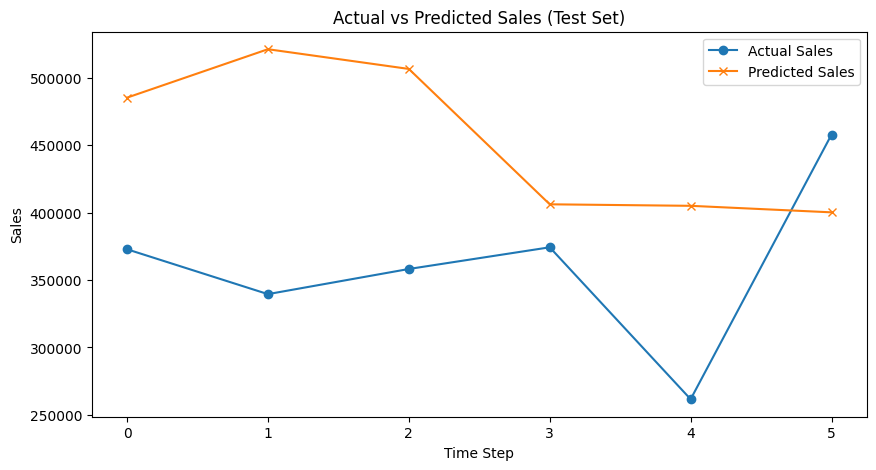

Root Mean Squared Error (RMSE): $124,161.44


Next 3 months forecast: [405098.56 408584.62 430489.8 ]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input  # Added Input
from sklearn.metrics import mean_squared_error
import numpy as np

print("\n=== LSTM Forecasting ===")
# Resample to monthly totals
df_monthly = sales_data.set_index('date')['sales'].resample('ME').sum()
plt.figure(figsize=(15, 6))
plt.plot(df_monthly, label='Monthly Sales')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_monthly.values.reshape(-1, 1))

def create_sequence(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = min(3, len(df_scaled) - 1)  # Adaptive: 3 for full data (24 months)
X, y = create_sequence(df_scaled, sequence_length)
if len(X) == 0:
    print("Not enough data for sequences—check monthly aggregation.")
else:
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model with Input layer (fixes warning)
    model_lstm = Sequential([
        Input(shape=(X_train.shape[1], 1)),  # Explicit Input
        LSTM(50, return_sequences=True),
        LSTM(50, return_sequences=False),
        Dense(1)
    ])
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    print(model_lstm.summary())  # Optional: See architecture

    # Train
    history = model_lstm.fit(
        X_train, y_train,
        epochs=20,  # Increased for full data
        batch_size=1,
        validation_data=(X_test, y_test),
        verbose=1  # Show progress
    )

    # Loss plot
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    if len(X_test) > 0:
        predictions = model_lstm.predict(X_test)
        predictions = scaler.inverse_transform(predictions)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Plot forecasts
        plt.figure(figsize=(10, 5))
        plt.plot(y_test_actual, label='Actual Sales', marker='o')
        plt.plot(predictions, label='Predicted Sales', marker='x')
        plt.title('Actual vs Predicted Sales (Test Set)')
        plt.xlabel('Time Step')
        plt.ylabel('Sales')
        plt.legend()
        plt.show()

        rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
        print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

        # Bonus: Forecast next 3 months (extend sequence)
        last_sequence = df_scaled[-sequence_length:].reshape(1, sequence_length, 1)
        future_preds = []
        for _ in range(3):
            next_pred = model_lstm.predict(last_sequence, verbose=0)
            future_preds.append(next_pred[0, 0])
            last_sequence = np.roll(last_sequence, -1, axis=1)
            last_sequence[0, -1, 0] = next_pred[0, 0]
        future_unscaled = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))
        print(f"Next 3 months forecast: {future_unscaled.flatten()}")
    else:
        print("No test data—train only (small dataset).")

*Part 5: K-Means Clustering (Products)*


=== K-Means Clustering ===


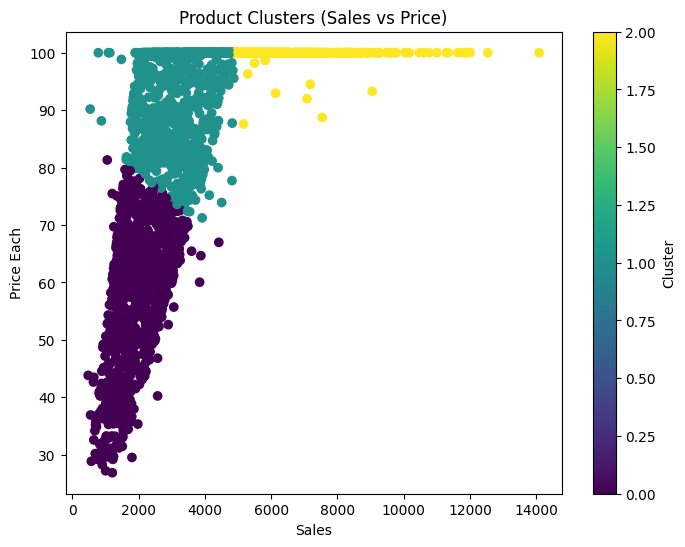

Clusters assigned. Sample:
         sales  price_each  cluster
0     2871.00       95.70        1
1     2765.90       81.35        1
2     3884.34       94.74        1
3     3746.70       83.26        1
4     5205.27      100.00        2
...       ...         ...      ...
2818  2244.40      100.00        1
2819  3978.51      100.00        1
2820  5417.57      100.00        2
2821  2116.16       62.24        0
2822  3079.44       65.52        0

[2823 rows x 3 columns]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("\n=== K-Means Clustering ===")
product_data = sales_data[['sales', 'price_each']].copy()
scaler_km = StandardScaler()
scaled_data = scaler_km.fit_transform(product_data)
kmeans = KMeans(n_clusters=min(3, len(product_data)), random_state=42, n_init=10)
product_data['cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(product_data['sales'], product_data['price_each'], c=product_data['cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Price Each')
plt.title('Product Clusters (Sales vs Price)')
plt.colorbar(label='Cluster')
plt.show()
print("Clusters assigned. Sample:\n", product_data[['sales', 'price_each', 'cluster']])

*Part 6: Recommendation System*

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("\n=== Recommendation System ===")
customer_product_matrix = sales_data.pivot_table(
    index='customer_name', columns='product_code', values='quantity'
).fillna(0)
customer_similarity = cosine_similarity(customer_product_matrix)

def recommend_products(customer_name, top_n=3):
    if customer_name not in customer_product_matrix.index:
        print(f"Customer {customer_name} not found.")
        return set()
    customer_idx = list(customer_product_matrix.index).index(customer_name)
    similarity_scores = customer_similarity[customer_idx]
    # Exclude self (index 0)
    similar_customers_idx = np.argsort(similarity_scores)[::-1][1:top_n+1]
    recommended_products = set()
    for idx in similar_customers_idx:
        # Products bought by similar customer
        customer_products = customer_product_matrix.iloc[idx][customer_product_matrix.iloc[idx] > 0].index.tolist()
        recommended_products.update(customer_products)
    return recommended_products

print("Available customers:", customer_product_matrix.index.tolist())
if len(customer_product_matrix.index) > 0:
    sample_customer = customer_product_matrix.index[0]
    recs = recommend_products(sample_customer)
    print(f"Recommendations for '{sample_customer}': {recs}")
else:
    print("No customers for recs.")


=== Recommendation System ===
Available customers: ['AV Stores, Co.', 'Alpha Cognac', 'Amica Models & Co.', "Anna's Decorations, Ltd", 'Atelier graphique', 'Australian Collectables, Ltd', 'Australian Collectors, Co.', 'Australian Gift Network, Co', 'Auto Assoc. & Cie.', 'Auto Canal Petit', 'Auto-Moto Classics Inc.', 'Baane Mini Imports', 'Bavarian Collectables Imports, Co.', 'Blauer See Auto, Co.', 'Boards & Toys Co.', 'CAF Imports', 'Cambridge Collectables Co.', 'Canadian Gift Exchange Network', 'Classic Gift Ideas, Inc', 'Classic Legends Inc.', 'Clover Collections, Co.', 'Collectable Mini Designs Co.', 'Collectables For Less Inc.', 'Corporate Gift Ideas Co.', 'Corrida Auto Replicas, Ltd', 'Cruz & Sons Co.', 'Daedalus Designs Imports', 'Danish Wholesale Imports', 'Diecast Classics Inc.', 'Diecast Collectables', 'Double Decker Gift Stores, Ltd', 'Dragon Souveniers, Ltd.', 'Enaco Distributors', 'Euro Shopping Channel', 'FunGiftIdeas.com', 'Gift Depot Inc.', 'Gift Ideas Corp.', 'Gifts4A

*Part 7: Inventory Optimization*


=== Inventory Optimization ===
Optimal Inventory Levels: [2871.   2765.9  3884.34]
Minimum Cost: 5790967.200566667


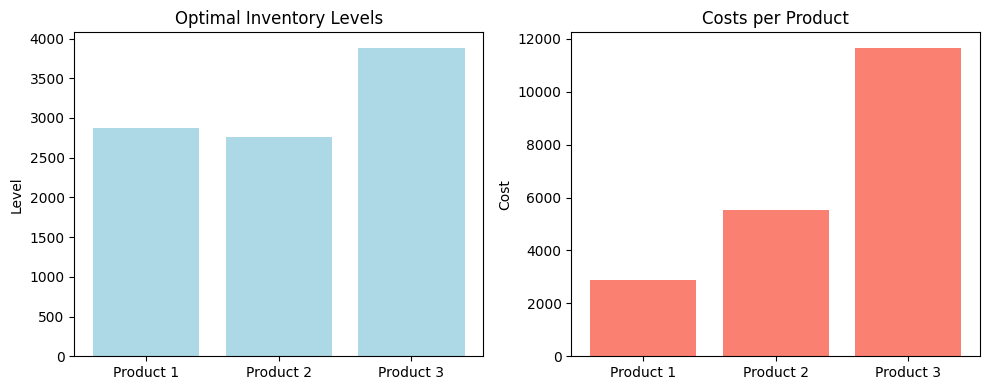

In [ ]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt

print("\n=== Inventory Optimization ===")
# Use sales per "product" (all S10_1678, so mock 3 variants; replace with groupby for full)
demand = sales_data['sales'].values[:3]  # Top 3 rows as proxy
order_cost = np.array([5, 7, 6])  # Per order
holding_cost = np.array([1, 2, 3])  # Per unit/month
c = (demand / 12 * holding_cost) + order_cost  # Approx objective

A = np.eye(len(demand)) * -1  # Inventory >= demand
b = -demand
bounds = [(0, None)] * len(demand)

result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
if result.success:
    print("Optimal Inventory Levels:", result.x)
    print("Minimum Cost:", result.fun)
    products = [f'Product {i+1}' for i in range(len(result.x))]
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(products, result.x, color='lightblue')
    plt.title('Optimal Inventory Levels')
    plt.ylabel('Level')
    plt.subplot(1, 2, 2)
    costs = result.x * holding_cost + order_cost
    plt.bar(products, costs, color='salmon')
    plt.title('Costs per Product')
    plt.ylabel('Cost')
    plt.tight_layout()
    plt.show()
else:
    print("Optimization failed:", result.message)

In [ ]:
# Export all for Power BI
monthly_sales.to_csv('monthly_sales.csv', index=False)
top_customers.to_frame().to_csv('top_customers.csv')
product_data.to_csv('clusters.csv', index=False)  # From K-Means
print("All exports ready for Power BI!")

All exports ready for Power BI!


In [1]:
from google.colab import auth
auth.authenticate_user()


In [4]:
from google.colab import auth
auth.authenticate_user()

!git config --global user.name "nawalkumar"
!git config --global user.email "nawalkumar4810167@gmail.com"

!git clone https://github.com/nawalkumar/Inventory-management-system-Data-Cleaning-ML-AI-.git
%cd /content/Inventory-management-system-Data-Cleaning-ML-AI-



fatal: destination path 'Inventory-management-system-Data-Cleaning-ML-AI-' already exists and is not an empty directory.
/content/Inventory-management-system-Data-Cleaning-ML-AI-


In [5]:
%cd /content/Inventory-management-system-Data-Cleaning-ML-AI-


/content/Inventory-management-system-Data-Cleaning-ML-AI-


In [7]:
!cp /content/Intelligent-Forecasting-and-Inventory-Management-System.ipynb /content/Inventory-management-system-Data-Cleaning-ML-AI-/


cp: cannot stat '/content/Intelligent-Forecasting-and-Inventory-Management-System.ipynb': No such file or directory


In [6]:
!cp /content/Intelligent-Forecasting-and-Inventory-Management-System.ipynb .

!git add .
!git commit -m "Added analysis notebook"
!git push


cp: cannot stat '/content/Intelligent-Forecasting-and-Inventory-Management-System.ipynb': No such file or directory
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
